# 3: Linear Regression on an Unknown Dataset

<a class="anchor" id="0.1"></a>
# **Table of Contents**

## 1. [Data Exploration](#1)
## 2. [Data Visualization](#2)
## 3. [Applying Linear Regression Model](#3)
### - 3.1. [Split and Reshaping our dataset](#4)
### - 3.2. [Apply the model](#5)
### - 3.3. [Interpreting Parameters](#6)
## 4. [Predictions](#7)
### - 4.1. [Loading our Validation Dataset](#8)
### - 4.2. [Predictions](#9)
### - 4.3. [Checking for accuracy](#10)
### - 4.4. [Visualization](#11)
### - 4.5. [Error Metrics](#12)
### - 4.6. [Saving Predictions](#13)

In [1]:
# Loading libraries
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import scatter_matrix
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC, NuSVC

import warnings
warnings.filterwarnings('ignore')

<a class="anchor" id="1"></a>
## Data Exploration

In [2]:
# Loading Data
train_Df = pd.read_csv("C:/Users/HP/Documents/ML/Py_Dataset/Linear Regression/datasets_1256_2242_train.csv")

train_df2 = train_Df.copy()
train_Df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [3]:
train_Df.shape

(700, 2)

In [4]:
train_Df.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [5]:
## Checking for missing values
for col in train_Df.columns:
    if train_Df[col].isnull().any():
        print('{}_column has {} missing data'.
              format(col,train_Df[col].isnull().sum()))
    else:
        print('{}_column is clean'.format(col))

x_column is clean
y_column has 1 missing data


In [6]:
train_Df[train_Df['y'].isnull()]

# Drop Missing index, the x_value is an outlier
train_Df.drop(213, inplace = True)
train_Df.reset_index(drop = True, inplace = True)

In [7]:
train_Df.iloc[210:215]

,x,y
210,27.0,24.582869
211,14.0,12.125738
212,100.0,100.015803
213,72.0,74.046827
214,5.0,1.611947


<a class="anchor" id="2"></a>
## Data Visualization

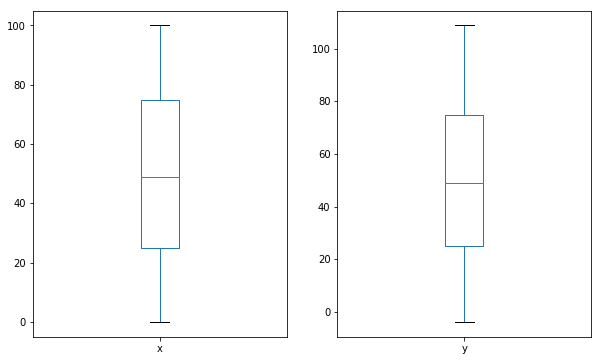

In [8]:
# Boxplots
train_Df.plot(kind = 'box', subplots = True, figsize = (10, 6), 
        sharex = False, sharey = False)
plt.show()

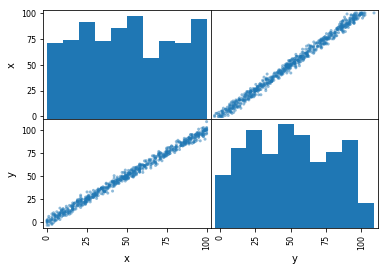

In [9]:
scatter_matrix(train_Df)
plt.show()

We can see here that the perfect positive relationship between both variables, lets explore further by examining the correlation.

So our first assumption/hypothesis: 
The data variables follow a linear relationship.
Alternatively
! The data variables follow a linear relationship.

In [10]:
corrs = train_Df.corr().unstack().sort_values(kind = 'quicksort').reset_index()
corrs = corrs[corrs['level_0'] != corrs['level_1']][::2]
corrs.columns = ['Feature', 'Target', 'Correlation Coef']
corrs.T

,0
Feature,x
Target,y
Correlation Coef,0.99534


We officially in data paradise, a linear model will be suitably sufficient.

<a class="anchor" id="3"></a>
# Applying Linear Regression Model

- Split and Reshaping our dataset
- Apply the model
- Interpreting Parameters

<a class="anchor" id="4"></a>
## Split and Reshape our DataSet

In [11]:
X_train = [train_Df['x'].values]

y_train = [train_Df['y'].values]

## Converting the array DataSet from 1D array to 2D array
X_train = np.reshape(X_train, (-1, 1))
y_train = np.reshape(y_train, (-1, 1))

<a class="anchor" id="5"></a>
## Applying Model

In [12]:
## Calling our model
from sklearn.linear_model import LinearRegression

In [13]:
#3 Fitting our dataset
linR = LinearRegression()

linR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<a class="anchor" id="6"></a>
## Model Parameters

In [14]:
print('Intercept: {} ; Slope: {}\n\ni.e for every one unit of change in X the change in Y is {}%'.
      format(linR.intercept_ , linR.coef_ , linR.coef_) )


Intercept: [-0.10726546] ; Slope: [[1.00065638]]

i.e for every one unit of change in X the change in Y is [[1.00065638]]%


<a class="anchor" id="7"></a>
# Predictions

- [Loading our Validation Dataset](#8)
- [Predictions](#9)
- [Checking for accuracy](#10)
- - [Visualization](#11)
- - [Error Metrics](#12)
- [Saving Predictions](#13)

<a class="anchor" id="8"></a>
### Loading our Validation Dataset

In [15]:
validation_Df = pd.read_csv("C:/Users/HP/Documents/ML/Py_Dataset/Linear Regression/datasets_1256_2242_test.csv")

validation_Df.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [16]:
validation_Df.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


In [17]:
X_val = validation_Df['x'].values
y_val = validation_Df['y'].values

X_val = np.reshape(X_val, (-1, 1))
y_val = np.reshape(y_val, (-1, 1))

<a class="anchor" id="9"></a>
## Predictions

In [18]:
predictions = linR.predict(X_val)

<a class="anchor" id="10"></a>
## Testing for Predictions'Accuracy

This step is to evaluate the performance of our algorithm and any other algorithm will perform on our dataset. 

In [19]:
test_pracc = pd.DataFrame({'Auctual':y_val.flatten(), 
                           'Predicted':predictions.flatten(), 
                           'Diff': (y_val - predictions).flatten()})

print(test_pracc.head(),'\n'), print(test_pracc['Diff'].mean())

     Auctual  Predicted      Diff
0  79.775152  76.943276  2.831876
1  23.177279  20.906519  2.270760
2  25.609262  21.907175  3.702087
3  17.857388  19.905862 -2.048474
4  41.849864  35.916364  5.933500 

0.3422159920903744


(None, None)

<a class="anchor" id="11"></a>
### Visualizing Accuracy
#### Visualizing Accuracy: Histograms

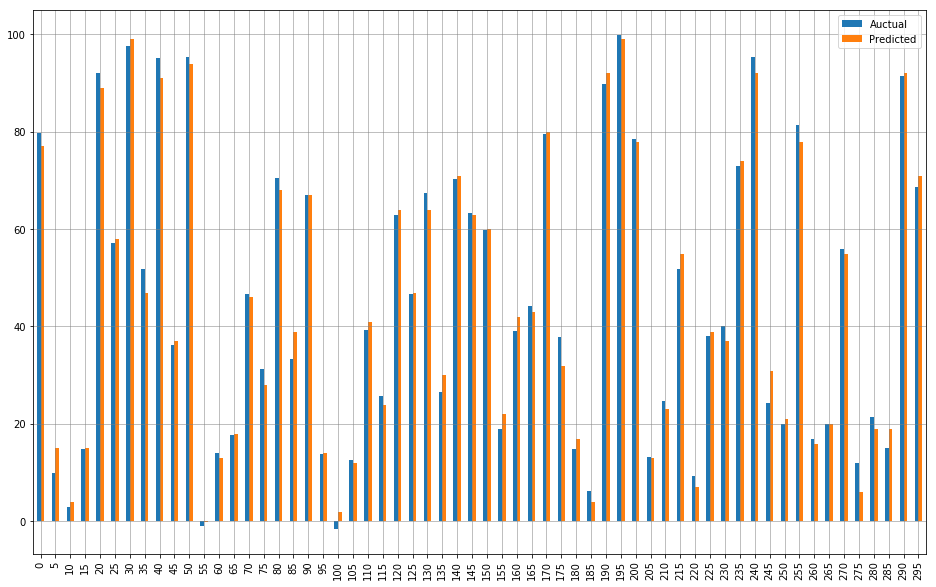

In [20]:
test_pracc2 = test_pracc.drop(columns = ['Diff'])[::5]    # Every 5th Row

test_pracc2.plot(kind = 'bar', figsize = (16, 10))

plt.grid(which = 'major', linestyle = '-', 
         linewidth = '0.5', color = 'grey')

plt.grid(which = 'minor', linestyle = ':', 
         linewidth = '0.5', color = 'black')

plt.show()

Except in in very few instances in plotted samples, the predictions closely resembles the auctual dataset, however since the above graph is limited to certain values, a `scatter graph` will more inclusive and will show any discrepancy.

#### Visualizing Accuracy: Scatter Graph

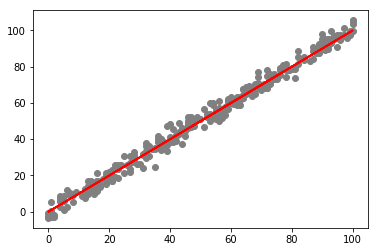

In [21]:
plt.scatter(X_val, y_val, color = 'gray')
plt.plot(X_val, predictions, color = 'red', linewidth = 2)
plt.show()

The Straight red line has we see above shows just how accurate our model is, also the features are gathered so without any significant outlier. The next step in managing our Accuracy is to check with metrics that explore the data description.

<a class="anchor" id="12"></a>
### Error Metrics

For regression algorithms, three evaluation metrics are commonly used:

- Mean Absolute Error [`MAE`]:
The mean of the absolute value of the errors.

- Mean Squared Error [`MSE`]:
The mean of the squared errors.

- Root Mean Squared Error [`RMSE`]:
The squared root of the `MSE`

The sklearn helps is quick computing of these values.

In [22]:
from sklearn import metrics

print('MAE:  {:.5f}\n'.
      format(metrics.mean_absolute_error(y_val, predictions)))

print('MSE:  {:.5f}\n'.
      format(metrics.mean_squared_error(y_val, predictions)))

print('RMSE: {:.5f}\n'.
      format(np.sqrt(metrics.mean_squared_error(y_val, predictions))))

MAE:  2.41577

MSE:  9.43292

RMSE: 3.07131



? Our model is quite accurate given it less than 10% of y_val.mean(0.1 * 51.205051). 

Our model is Reliable and we will have to accept our initial assumption about the data.

Conclusively let us save our Predictions.

<a class="anchor" id="13"></a>
## Saving Predictions

In [23]:
predictions = pd.DataFrame(predictions)
predictions.columns = ['Predictions']
predictions.head()

,Predictions
0,76.943276
1,20.906519
2,21.907175
3,19.905862
4,35.916364


In [24]:
predictions.to_csv("C:/Users/HP/Documents/ML/Py_Dataset/Linear Regression/Predictions.csv")